In [1]:
import csv
with open('fruit_data_with_colors.txt') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

fruit_label	fruit_name	fruit_subtype	mass	width	height	color_score
1	apple	granny_smith	192	8.4	7.3	0.55
1	apple	granny_smith	180	8.0	6.8	0.59
1	apple	granny_smith	176	7.4	7.2	0.60
2	mandarin	mandarin	86 	6.2	4.7	0.80
2	mandarin	mandarin	84 	6.0	4.6	0.79
2	mandarin	mandarin	80 	5.8	4.3	0.77
2	mandarin	mandarin	80 	5.9 	4.3	0.81
2	mandarin	mandarin	76	5.8	4.0	0.81
1	apple	braeburn	178	7.1	7.8	0.92
1	apple	braeburn	172	7.4	7.0	0.89
1	apple	braeburn	166	6.9	7.3	0.93
1	apple	braeburn	172	7.1	7.6	0.92
1	apple	braeburn	154	7.0	7.1	0.88
1	apple	golden_delicious	164	7.3	7.7	0.70
1	apple	golden_delicious	152	7.6	7.3	0.69
1	apple	golden_delicious	156	7.7	7.1	0.69
1	apple	golden_delicious	156	7.6	7.5	0.67
1	apple	golden_delicious	168	7.5	7.6	0.73
1	apple	cripps_pink	162	7.5	7.1	0.83
1	apple	cripps_pink	162	7.4	7.2	0.85
1	apple	cripps_pink	160	7.5	7.5	0.86
1	apple	cripps_pink	156	7.4	7.4	0.84
1	apple	cripps_pink	140	7.3	7.1	0.87
1	apple	cripps_pink	170	7.6	7.9	0.88
3	orange	spanish_jumbo	342	9.0	9

## KNN

In [34]:
import csv
import random
#Loading Dataset
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(5):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [104]:
trainingSet=[]
testSet=[]
loadDataset('fruit.data.txt',0.75, trainingSet, testSet)
print('Train: '+ repr(len(trainingSet)))
print('Test: '+ repr(len(testSet)))

Train: 49
Test: 10


In [35]:
import math 
#calculate distance
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]),2)
    return math.sqrt(distance)

In [96]:
data1 = [170,7.6,7.9,0.88,1]
data2 = [152,7.0,6.8,0.55,2]
distance = euclideanDistance(data1, data2, 4)
print('Dsitance: ' + repr(distance))

Dsitance: 18.043558407365218


In [94]:
import operator
#calculate k nearest neighbor from test instances
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1;
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [101]:
trainingSet = [[172.0, 7.1, 7.6, 0.92, 1.0], [174.0, 7.3, 10.1, 0.7, 4.0]]
testInstance = [170,7.6,7.9,0.88]
k = 1
neighbors = getNeighbors(trainingSet, testInstance, k)
print(neighbors)

[[172.0, 7.1, 7.6, 0.92, 1.0]]


In [37]:
import operator
#predict the response from the neighbors
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1;
        else:
            classVotes[response] = 1;
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]    

In [102]:
neighbors = [[172.0, 7.1, 7.6, 0.92, 1.0], [170.0, 7.6, 7.9, 0.88, 3.0], [174.0, 7.3, 10.1, 0.7, 3.0]]
response = getResponse(neighbors)
print(response)

3.0


In [38]:
def getAccuracy(testSet, predictions):
    count = 0
    for x in range (len(testSet)):
        if testSet[x][-1] == predictions[x]:
            count += 1
    return (count/len(testSet)) * 100.0

In [103]:
def main():
    trainingSet=[]
    testSet=[]
    split=0.80
    loadDataset('fruit.data.txt',split,trainingSet, testSet)
    print('Train: '+ repr(len(trainingSet)))
    print('Test: '+ repr(len(testSet)))
    
    predictions=[]
    k=3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy:' + repr(accuracy) + '%')
    
main()    

Train: 49
Test: 10
predicted=2.0, actual=2.0
predicted=1.0, actual=1.0
predicted=3.0, actual=1.0
predicted=3.0, actual=3.0
predicted=3.0, actual=3.0
predicted=4.0, actual=3.0
predicted=3.0, actual=3.0
predicted=1.0, actual=4.0
predicted=4.0, actual=4.0
predicted=4.0, actual=4.0
Accuracy:70.0%


## Data Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [15]:
fruits=pd.read_csv('1.data.txt', names=['Id','Mass', 'Width', 'Height', 'color_score','Class'])

In [4]:
fruits.describe()

,Mass,Width,Height,color_score,Class
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762034,2.542373
std,55.018832,0.816938,1.361017,0.077455,1.208048
min,76.000000,5.800000,4.000000,0.550000,1.000000
25%,140.000000,6.600000,7.200000,0.720000,1.000000
50%,158.000000,7.200000,7.600000,0.750000,3.000000
75%,177.000000,7.500000,8.200000,0.810000,4.000000
max,362.000000,9.600000,10.500000,0.930000,4.000000


In [103]:
fruits.head()

,Mass,Width,Height,color_score,Class
0,192,8.4,7.3,0.55,1
1,180,8.0,6.8,0.59,1
2,176,7.4,7.2,0.60,2
3,86,6.2,4.7,0.80,2
4,84,6.0,4.6,0.79,2


In [68]:
fruits['Class'].value_counts()

1    19
3    19
4    16
2     5
Name: Class, dtype: int64

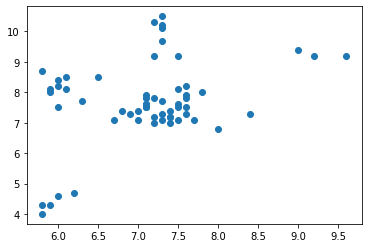

In [66]:
plt.scatter(fruits['Width'],fruits['Height'])

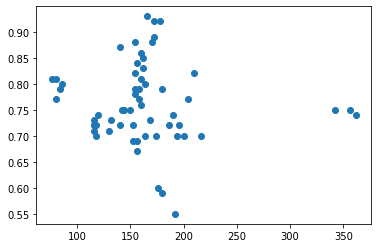

In [67]:
plt.scatter(fruits['Mass'],fruits['color_score'])

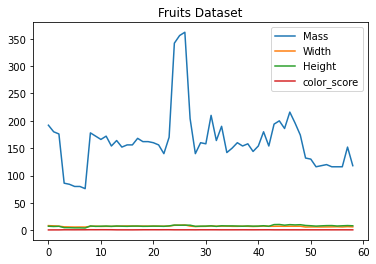

In [107]:
columns = fruits.columns.drop(['Class'])

x_data = range(0, fruits.shape[0])

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, fruits[column], label=column)

ax.set_title('Fruits Dataset')
ax.legend()